# dataset one ( CC - DDos)

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd

In [6]:
data_path = 'dataset 2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(data_path)
data.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
data[data.columns[0]].unique()

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.3-192.168.10.8-445-10414-6',
       '192.168.10.3-192.168.10.8-53-51617-17',
       '192.168.10.8-72.21.81.253-10398-443-6'], dtype=object)

In [9]:
data.tail(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,192.168.10.15-8.43.72.21-61326-80-6,8.43.72.21,80,192.168.10.15,61326,6,7/7/2017 5:02,68,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [247]:
data.sample(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
14749,192.168.10.3-192.168.10.50-53-36144-17,192.168.10.50,36144,192.168.10.3,53,17,7/7/2017 3:46,155,2,2,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
52138,172.16.0.1-192.168.10.50-18888-80-6,192.168.10.50,80,172.16.0.1,18888,6,7/7/2017 3:59,3902771,1,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [248]:
row , col = data.shape
print(f'ROW (Samples) : {row} \nCOL (Features) : {col}')

ROW (Samples) : 225745 
COL (Features) : 85


In [249]:
data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [250]:
data[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

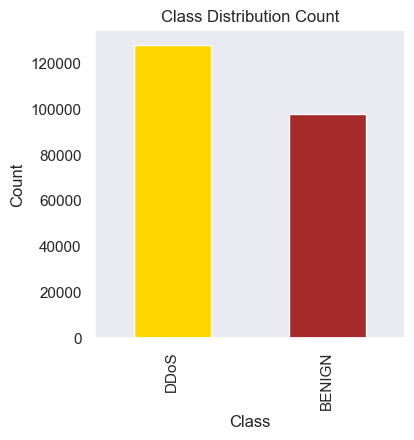

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
data[' Label'].value_counts().plot(kind='bar', color=['gold', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

In [11]:
# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

new_col

{'Flow ID': 'Flow ID',
 ' Source IP': 'Source IP',
 ' Source Port': 'Source Port',
 ' Destination IP': 'Destination IP',
 ' Destination Port': 'Destination Port',
 ' Protocol': 'Protocol',
 ' Timestamp': 'Timestamp',
 ' Flow Duration': 'Flow Duration',
 ' Total Fwd Packets': 'Total Fwd Packets',
 ' Total Backward Packets': 'Total Backward Packets',
 'Total Length of Fwd Packets': 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets': 'Total Length of Bwd Packets',
 ' Fwd Packet Length Max': 'Fwd Packet Length Max',
 ' Fwd Packet Length Min': 'Fwd Packet Length Min',
 ' Fwd Packet Length Mean': 'Fwd Packet Length Mean',
 ' Fwd Packet Length Std': 'Fwd Packet Length Std',
 'Bwd Packet Length Max': 'Bwd Packet Length Max',
 ' Bwd Packet Length Min': 'Bwd Packet Length Min',
 ' Bwd Packet Length Mean': 'Bwd Packet Length Mean',
 ' Bwd Packet Length Std': 'Bwd Packet Length Std',
 'Flow Bytes/s': 'Flow Bytes/s',
 ' Flow Packets/s': 'Flow Packets/s',
 ' Flow IAT Mean': 'Flow IAT Mea

In [12]:
# updating dataframe
data.rename(columns=new_col, inplace=True)
data.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225745 non-null  object 
 1   Source IP                    225745 non-null  object 
 2   Source Port                  225745 non-null  int64  
 3   Destination IP               225745 non-null  object 
 4   Destination Port             225745 non-null  int64  
 5   Protocol                     225745 non-null  int64  
 6   Timestamp                    225745 non-null  object 
 7   Flow Duration                225745 non-null  int64  
 8   Total Fwd Packets            225745 non-null  int64  
 9   Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets  225745 non-null  int64  
 11  Total Length of Bwd Packets  225745 non-null  int64  
 12  Fwd Packet Length Max        225745 non-null  int64  
 13 

In [15]:
data.columns[:2]

Index(['Flow ID', 'Source IP'], dtype='object')

In [16]:
data[data.columns[0]].values

array(['192.168.10.5-104.16.207.165-54865-443-6',
       '192.168.10.5-104.16.28.216-55054-80-6',
       '192.168.10.5-104.16.28.216-55055-80-6', ...,
       '192.168.10.15-72.21.91.29-61375-80-6',
       '192.168.10.15-8.41.222.187-61323-80-6',
       '192.168.10.15-8.43.72.21-61326-80-6'], dtype=object)

In [17]:
data[data.columns[:2]]

,Flow ID,Source IP
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102
...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187


In [258]:
data.Label.unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [18]:
print(data.isnull().sum().sum())
print(data.isnull().sum().sum())

4
4


In [19]:
data = data[data['Flow Bytes/s'].isnull() == False]
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [20]:
data.shape

(225741, 85)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225741 non-null  object 
 1   Source IP                    225741 non-null  object 
 2   Source Port                  225741 non-null  int64  
 3   Destination IP               225741 non-null  object 
 4   Destination Port             225741 non-null  int64  
 5   Protocol                     225741 non-null  int64  
 6   Timestamp                    225741 non-null  object 
 7   Flow Duration                225741 non-null  int64  
 8   Total Fwd Packets            225741 non-null  int64  
 9   Total Backward Packets       225741 non-null  int64  
 10  Total Length of Fwd Packets  225741 non-null  int64  
 11  Total Length of Bwd Packets  225741 non-null  int64  
 12  Fwd Packet Length Max        225741 non-null  int64  
 13 

In [22]:
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = data[col].astype('category').cat.codes

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      225741 non-null  int32  
 1   Source IP                    225741 non-null  int16  
 2   Source Port                  225741 non-null  int64  
 3   Destination IP               225741 non-null  int16  
 4   Destination Port             225741 non-null  int64  
 5   Protocol                     225741 non-null  int64  
 6   Timestamp                    225741 non-null  int8   
 7   Flow Duration                225741 non-null  int64  
 8   Total Fwd Packets            225741 non-null  int64  
 9   Total Backward Packets       225741 non-null  int64  
 10  Total Length of Fwd Packets  225741 non-null  int64  
 11  Total Length of Bwd Packets  225741 non-null  int64  
 12  Fwd Packet Length Max        225741 non-null  int64  
 13 

In [23]:
data.Label.unique()

array([0, 1], dtype=int8)

In [24]:
data.duplicated().sum()

2

In [25]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(225739, 85)

In [26]:
import numpy as np
print(np.isinf(data).sum().sum())

60


In [27]:
for col in data.columns: 
    if np.isinf(data[col]).sum() > 0:
        print(col, ' : ' , np.isinf(data[col]).sum())

Flow Bytes/s  :  30
Flow Packets/s  :  30


In [28]:
data = data[np.isinf(data['Flow Bytes/s']) != True]
data = data[np.isinf(data['Flow Packets/s']) != True]
data.shape

(225709, 85)

In [29]:
for col in data.columns: 
    if data[col].dtype == 'float64': 
        data[col] = data[col].astype('int32')
        print(data[col].unique())

[   6   18   14    0  124   84   37    8 1326  308    1   11   43   42
   27   46  280   39   34   73   35   40   32   36   64   66   28   29
   50   26   25   55   30   31   61   20   53   48   38   58  146   33
  129   19   97   80  103   45   23   81   22  565   96   47   41  135
   82   60   54   52   56   59   51   65   49   74   78   62   57   44
   75   77   94   79   71  145    4  136  140  154  105  125  250  160
  143  101  107   89   72  130   70   92  675  195  147    2  364  203
  210  221  117   21  274  199  222  300  266  119  114   63   67   83
   68  298  113  193  120  150  192  256  118  141  108  167   93  165
   90  131  148  543  144  109 1254  149  189  226  238  186  292   88
  272  365  134  166  164   91   85  126   86   99  346   87   16   15
 2097 1797 2101 2016 2216 2075 2258 2091 1448 2129 1947 1703 1991 2131
 2147   12  713  891  804  877  807  730  175  188  666  324   95  155
   69  151    3  257  304  142  122  139  340  410  369  279  349  667
  110 

In [30]:
X, y  = data.drop(columns=['Label']) , data.Label
X.shape

(225709, 84)

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize MinMaxScaler to scale data to [0,1]
scaler = MinMaxScaler()

# Fit and transform training data
X_scalled = scaler.fit_transform(X)
X_scalled

array([[0.96025226, 0.0106486 , 0.00675985, ..., 0.        , 0.        ,
        0.        ],
       [0.96062254, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.96063411, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.65685027, 0.93175218, 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.65790326, 0.95982575, 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.65798426, 0.96127783, 0.00122074, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
X_scalled.shape

(225709, 84)

In [33]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

# Apply SMOTE to balance the dataset
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_scalled, y)

In [36]:
print(y_resampled.value_counts())
X_resampled

1    128015
0    128010
Name: Label, dtype: int64


array([[0.96025226, 0.0106486 , 0.00675985, ..., 0.        , 0.        ,
        0.        ],
       [0.96062254, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       [0.96063411, 0.017909  , 0.00122074, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.351539  , 0.20619555, 0.6591998 , ..., 0.        , 0.        ,
        0.        ],
       [0.35155057, 0.20619555, 0.65921506, ..., 0.        , 0.        ,
        0.        ],
       [0.35155057, 0.20619555, 0.65921506, ..., 0.        , 0.        ,
        0.        ]])

<Figure size 400x400 with 0 Axes>

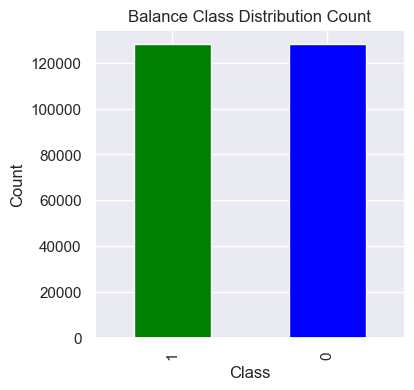

In [37]:
import seaborn as sn 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()

In [38]:
y_resampled.value_counts()

1    128015
0    128010
Name: Label, dtype: int64

In [39]:
# machine learning developement

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [40]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)
X_train.shape

(204820, 84)

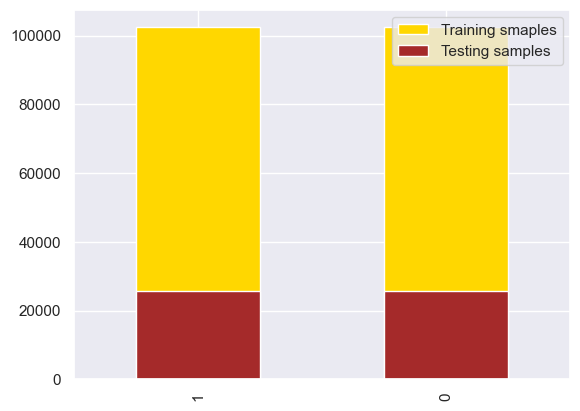

In [41]:
# confirming if the training the testing sample is balance 
y_train.value_counts().plot(kind='bar', color=['gold', 'gold'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [42]:
X_test

array([[4.71025226e-01, 2.06195547e-01, 9.07620472e-01, ...,
        0.00000000e+00, 7.96666667e-01, 7.96666667e-01],
       [3.53239991e-01, 2.06195547e-01, 7.52327036e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.33823189e-01, 3.35914811e-01, 6.31626331e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.68757232e-01, 3.37366893e-01, 9.13602100e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.72124508e-01, 3.39787028e-01, 8.42417676e-01, ...,
        4.14977029e-04, 8.41666667e-02, 8.33196250e-02],
       [5.32099051e-01, 3.40271055e-01, 1.22074038e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [43]:
import numpy as np
import pyswarms as ps
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,f1_score
import seaborn as sn
import random
import time
import warnings

warnings.filterwarnings('ignore')

In [44]:
def compute_metrics(tp, fp, fn, tn, avg_detection_time=None):

    # Safety check to prevent division by zero
    total = tp + fp + fn + tn
    positive = tp + fn
    negative = tn + fp

    # Metrics calculations
    tpr = tp / positive if positive > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / negative if negative > 0 else 0  # False Positive Rate
    fnr = fn / positive if positive > 0 else 0  # False Negative Rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tpr  # Recall is the same as TPR
    specificity = tn / negative if negative > 0 else 0
    accuracy = (tp + tn) / total if total > 0 else 0

    # Pack into dictionary
    metrics = {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "AVG EXE TIME": f'{avg_detection_time:.8f}'
    }

    return metrics  

In [45]:

# Custom DBN Class (varying number of RBM stacks)
class DBNClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, num_rbms=2, learning_rate=0.01, n_iter=4):
        self.num_rbms = num_rbms
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.pipeline = None

    def fit(self, X, y):
        layers = []
        rbm_sizes = [128, 256, 512]  # Fixed RBM sizes

        for i in range(self.num_rbms):
            layers.append(("rbm" + str(i), BernoulliRBM(n_components=rbm_sizes[i], learning_rate=self.learning_rate, n_iter=self.n_iter, verbose=0)))

        layers.append(("logreg", LogisticRegression(max_iter=1000)))
        self.pipeline = Pipeline(layers)
        self.pipeline.fit(X, y)
        return self

    def predict(self, X):
        return self.pipeline.predict(X)


# Define PSO objective function (optimize num_rbms)
def objective_function(params):
    num_rbms = int(params[0])  # Number of RBMs

    if num_rbms < 1 or num_rbms > 3:  # Limit number of RBM layers
        return 1e6  # Penalize invalid solutions

    model = DBNClassifier(num_rbms=num_rbms)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return -accuracy_score(y_test, y_pred)  # PSO minimizes, so negate accuracy

# Set PSO bounds (optimize only num_rbms between 1-3)
bounds = [(4, 8)]

mean = 0 

# execute for 10 iteration
for i in range(10): 
    # PSO optimization
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=len(bounds), options={'c1': 1.5, 'c2': 1.5, 'w': 0.5}, bounds=np.array(bounds).T)
    
    best_cost, best_num_rbms = optimizer.optimize(objective_function, iters=5)
    
    print("Best Number of RBM Stacks:", int(best_num_rbms[0]))
    mean = mean + int(best_num_rbms[0])

print('Best Average Stack', int(mean/10))

2025-04-08 18:04:25,646 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:25,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.9052556]
2025-04-08 18:04:25,990 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 4


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,020 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.18510073]
2025-04-08 18:04:26,040 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,238 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.7911886]
2025-04-08 18:04:26,263 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,296 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.46801145]
2025-04-08 18:04:26,358 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,387 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.71042852]


Best Number of RBM Stacks: 4


2025-04-08 18:04:26,428 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,460 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.58563834]


Best Number of RBM Stacks: 6


2025-04-08 18:04:26,484 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,560 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.82146044]


Best Number of RBM Stacks: 5


2025-04-08 18:04:26,584 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,638 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.94867545]


Best Number of RBM Stacks: 4


2025-04-08 18:04:26,663 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,691 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.53719245]
2025-04-08 18:04:26,729 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=1e+6
2025-04-08 18:04:26,763 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.37625743]


Best Number of RBM Stacks: 4
Best Average Stack 5


#### GENETIC ALGORITHM OPTIMIZATION (BEST LEARNING RATE SELECTOR)

In [66]:
# Genetic Algorithm
# Fitness function
def fitness_function(learning_rate):
    model = DBNClassifier(learning_rate=learning_rate)
    model.fit(X_train[:10000], y_train[:10000])
    y_pred = model.predict(X_test[:10000])
    return accuracy_score(y_test[:10000], y_pred)

# Genetic Algorithm
def genetic_algorithm(pop_size=10, generations=10, mutation_rate=0.1, bounds=(0.001, 0.1)):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], pop_size)
    for generation in range(generations):
        # Evaluate fitness
        fitness = np.array([fitness_function(ind) for ind in population])
        # Select the best individuals
        sorted_indices = np.argsort(fitness)[::-1]
        parents = population[sorted_indices[:pop_size // 2]]
        # Crossover: Generate offspring
        offspring = []
        for _ in range(pop_size // 2):
            parent1, parent2 = random.sample(list(parents), 2)
            child = (parent1 + parent2) / 2  # Average crossover
            offspring.append(child)
        # Mutation: Apply random changes
        offspring = np.array(offspring)
        mutations = np.random.uniform(-mutation_rate, mutation_rate, size=offspring.shape)
        offspring += mutations
        offspring = np.clip(offspring, bounds[0], bounds[1])  # Ensure within bounds
        # Create the new population
        population = np.concatenate((parents, offspring))
        # Log progress
        best_individual = population[np.argmax(fitness)]
        best_fitness = max(fitness)
        print(f"Generation {generation + 1}: Best Learning Rate = {best_individual:.5f}, Accuracy = {best_fitness:.4f}")
    
    # Return the best learning rate
    best_individual = population[np.argmax(fitness)]
    return best_individual

# Run GA
best_learning_rate = genetic_algorithm()
print(f"Optimal Learning Rate: {best_learning_rate:.5f}")

Generation 1: Best Learning Rate = 0.07226, Accuracy = 0.9724
Generation 2: Best Learning Rate = 0.06987, Accuracy = 0.9734
Generation 3: Best Learning Rate = 0.04360, Accuracy = 0.9732
Generation 4: Best Learning Rate = 0.07226, Accuracy = 0.9717
Generation 5: Best Learning Rate = 0.00154, Accuracy = 0.9735
Generation 6: Best Learning Rate = 0.04360, Accuracy = 0.9726
Generation 7: Best Learning Rate = 0.10000, Accuracy = 0.9745
Generation 8: Best Learning Rate = 0.09329, Accuracy = 0.9705
Generation 9: Best Learning Rate = 0.10000, Accuracy = 0.9692
Generation 10: Best Learning Rate = 0.09455, Accuracy = 0.9714
Optimal Learning Rate: 0.09455


#### PROPOSED DBN ARCHITECTURE

In [46]:
# mergin everything...
class DBN_network: 

    def __init__(self, neurons=100, learning_rate=0.8, epoch=4): 
        self.neurons = neurons
        self.learning_rate=learning_rate 
        self.epoch = epoch
        self.layers_objects = []
        print('parameter initialize...')

    def config_network(self, neurons, layers=2, learning_rate=0.8):
        self.layers_objects = []
        if layers != len(neurons):
            print(f' Neuron List Value {len(neurons)} must equal Layer value {layers} layers')
        else: 
            for ep in range(layers): 
                # print(f' \n Epoch : {ep}')
                ly = BernoulliRBM(n_components=neurons[ep], learning_rate=learning_rate, n_iter=4, verbose=1)
                self.layers_objects.append(ly)
                # print(ly)

            # specify the classification head
            classifier = LogisticRegression(max_iter=1000)
            self.layers_objects.append(classifier)
            
   # to visualize the architecture using pipeline
    def summary(self):
        # using pipeline to visualize the DBN Architecture.... 
        arch_list = []
        for item in range(len(self.layers_objects)):
            arch_list.append((f'layer_{item+1}', self.layers_objects[item]))
        
        self.arch_summary = Pipeline(
            arch_list
        )

        print('DBN architecture Summary')
        return self.arch_summary

    # function to train the model... 
    def fit_model(self, X_train, y_train): 
        print(f'Training For {len(self.layers_objects[:-1])} Layer')
        self.fited_arch = []
        init_sample = X_train
        init_y = y_train
        count = 0 
        for layer in self.layers_objects[:-1]:
            print(f'\n *******************  EPOCH {count + 1} **********************')
            # fit and transform....  
            fited = layer.fit(init_sample)
            feature  = fited.transform(init_sample)
        
            # update weights
            init_sample = feature
        
            # store layer weights
            self.fited_arch.append(fited)
            count = count + 1
            
        # fit the classification head 
        print('\n+-----------------------------------------+')
        self.class_head = self.layers_objects[-1].fit(init_sample, init_y)
        
        return self.arch_summary

    # prediction  function 
    def predict(self, X_test, y_test): 
        init_sample = X_test
        init_y = y_test
        for layer in self.fited_arch:
            
            # transform....  
            feature  = layer.transform(init_sample)
            
            # update weights
            init_sample = feature
            print(f'Calculated Feature {init_sample.shape}')
                           
        # fit the classification head 
        if self.fited_arch != []: 
            prediction = self.class_head.predict(init_sample)
            pre = {'pre': prediction}
            return pre
        else: 
            error = 'Error: model should be trained first....'
            return {error, []}


In [47]:
X_train.shape

(204820, 84)

In [48]:
# initializaing DBN
dbn = DBN_network()
# configure the DBN... 
dbn.config_network([84, 84, 42, 42, 12], layers=5, learning_rate=0.09455)

# showing the DBN architecture.. 
dbn.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09455, n_components=12, n_iter=4,
                              verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [49]:
# training the arhitecture
strt_time = time.time()
dbn.fit_model(X_train, y_train)
stop_time = time.time()

data_1_total_training_time = stop_time - strt_time
print('Total Training Time : ', data_1_total_training_time)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -10.59, time = 29.59s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -12.53, time = 32.18s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -9.54, time = 23.74s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -11.00, time = 21.84s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -5.39, time = 19.13s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -5.44, time = 20.57s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -5.60, time = 19.82s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5.74, time = 19.42s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.72, time = 24.94s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.91, time = 39.11s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.07, time = 24.12s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.43, 

Calculated Feature (51205, 84)
Calculated Feature (51205, 84)
Calculated Feature (51205, 42)
Calculated Feature (51205, 42)
Calculated Feature (51205, 12)

EXE TIME
Total Detection Time : 2.831998
AVG Detection Time : 0.00005531 

              precision    recall  f1-score   support

           0       1.00      0.47      0.64     25602
           1       0.65      1.00      0.79     25603

    accuracy                           0.73     51205
   macro avg       0.83      0.73      0.71     51205
weighted avg       0.83      0.73      0.71     51205





<Axes: >

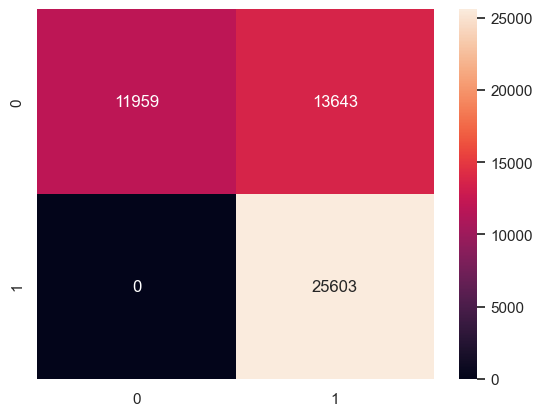

In [50]:
# make prediction
strt_time = time.time()
prediction = dbn.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [185]:
tp, fp, fn, tn = conf_report.ravel()
metrics1 = compute_metrics(tp, fp, fn, tn, avg_time)
print(metrics1)
result = pd.Series(metrics1)
CIC_DDos_result = result
CIC_DDos_result

{'TPR (Recall)': 1.0, 'FPR': 0.23236290588552755, 'FNR': 0.0, 'Accuracy': 0.8486505487638167, 'Precision': 0.6973010975276335, 'Recall': 1.0, 'Specificity': 0.7676370941144725, 'AVG EXE TIME': '0.00002803'}


TPR (Recall)           1.0
FPR               0.232363
FNR                    0.0
Accuracy          0.848651
Precision         0.697301
Recall                 1.0
Specificity       0.767637
AVG EXE TIME    0.00002803
dtype: object

## Dataset 2 (BOT-IOT dataset)

In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [191]:
import pandas as pd 

In [192]:
data1 = pd.read_csv('BOT-IOT/reduced_data_1.csv')
data2 = pd.read_csv('BOT-IOT/reduced_data_2.csv')
data3 = pd.read_csv('BOT-IOT/reduced_data_3.csv')
data4 = pd.read_csv('BOT-IOT/reduced_data_4.csv')

df = pd.concat([data1, data2, data3, data4])

df.head()

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


In [193]:
df.head(2)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP


In [194]:
df.tail(2)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
668520,3668521,1.529381e+09,e,1,tcp,1,192.168.100.3,43001,192.168.100.150,4433,...,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging
668521,3668522,1.529381e+09,e,1,arp,2,192.168.100.3,-1,192.168.100.149,-1,...,0.018868,2,3,0.018868,0.018868,16,16,1,Theft,Keylogging


In [195]:
df.sample(3)

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
707132,2707133,1.528099e+09,e,1,udp,3,192.168.100.150,5798,192.168.100.3,80,...,0.464136,100,100,0.464136,0.464136,700,700,1,DDoS,UDP
789569,789570,1.528085e+09,e,1,udp,3,192.168.100.150,47443,192.168.100.3,80,...,0.444276,37,37,0.444276,0.324568,407,407,1,DoS,UDP
434930,434931,1.528081e+09,e s,2,tcp,1,192.168.100.147,33604,192.168.100.7,80,...,0.209367,88,88,0.209283,0.212365,440,440,1,DoS,TCP


In [196]:
row , col = df.shape
print(f'ROW (Samples) : {row} \nCOL (Features) : {col}')

ROW (Samples) : 3668522 
COL (Features) : 46


In [197]:
df['attack'].value_counts()

1    3668045
0        477
Name: attack, dtype: int64

In [198]:
df['category'].value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

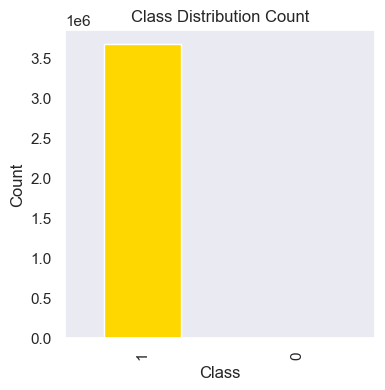

In [199]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
df['attack'].value_counts().plot(kind='bar', color=['gold', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

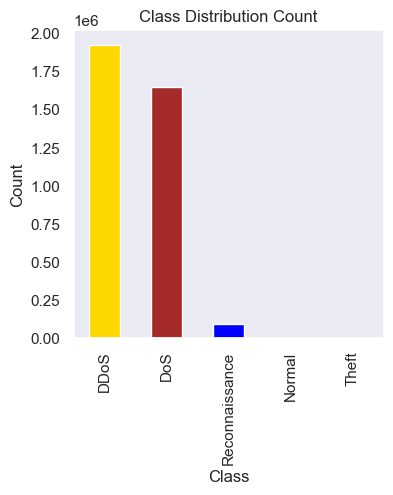

In [200]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
df['category'].value_counts().plot(kind='bar', color=['gold', 'brown', 'blue', 'red'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               flo

In [202]:
# convert object to cateries type before encoding
for col in df.columns: 
    if df[col].dtype == 'object': 
        df[col] = df[col].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668522 entries, 0 to 668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              int8   
 3   flgs_number                       int64  
 4   proto                             int8   
 5   proto_number                      int64  
 6   saddr                             int8   
 7   sport                             int32  
 8   daddr                             int8   
 9   dport                             int16  
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             int8   
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               flo

In [203]:
for col in df.columns[:30]:
    print('columns :' , col)
    print(df[col][-10:])

columns : pkSeqID
668512    3668513
668513    3668514
668514    3668515
668515    3668516
668516    3668517
668517    3668518
668518    3668519
668519    3668520
668520    3668521
668521    3668522
Name: pkSeqID, dtype: int64
columns : stime
668512    1.529381e+09
668513    1.529381e+09
668514    1.529381e+09
668515    1.529381e+09
668516    1.529381e+09
668517    1.529381e+09
668518    1.529381e+09
668519    1.529381e+09
668520    1.529381e+09
668521    1.529381e+09
Name: stime, dtype: float64
columns : flgs
668512    0
668513    0
668514    0
668515    0
668516    0
668517    0
668518    0
668519    0
668520    0
668521    0
Name: flgs, dtype: int8
columns : flgs_number
668512    1
668513    1
668514    1
668515    1
668516    1
668517    1
668518    1
668519    1
668520    1
668521    1
Name: flgs_number, dtype: int64
columns : proto
668512    3
668513    3
668514    3
668515    3
668516    3
668517    3
668518    3
668519    3
668520    3
668521    0
Name: proto, dtype: int8
column

In [204]:
df.duplicated().sum()

0

In [205]:
df.isnull().sum()

pkSeqID                             0
stime                               0
flgs                                0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

In [206]:
for col in df.columns: 
    if df[col].dtype == 'float64': 
        df[col] = df[col].astype('int32')
        print(df[col].unique())

[1528088521 1528088522 1528088523 ... 1529380788 1529380790 1529380791]
[1528088528 1528088521 1528088529 ... 1529380790 1529380793 1529381593]
[   7    0 1555    6    5    4    3   42   21   22   20   19   18   39
   17   38   16   14   10   13    1   30   33   31   32   28   23   24
   25   26   27   15   12   37   29    8   34   35   36   59   49   55
   56   58   62   50   51   57   45    9   11   54   53   52   48   46
  113   43   40   41   44 1195 1453 1454  569    2 1152  728 1253 1153
 1685 1686 1679   61  900  171 1479 1478  100  170 1090 1936 1940 1456
  981  851 1176  788  575  218 1743 1745 1746 1197 1455 1290 1279 1284
 1283  353  804 1097 1098 1099 1096 1676 1677 1675 1682 1674 1678 1681
 1673 1684 1672 2771 2760 2688 2728 2738 2725 2756 2743   63   71   80
   89   97  105  114  122  130  139  147  155  181  165  190  172  198
  206  213  221  229  238  246  254  263  271  279  288  296  305  314
  322  330  339  347  355  364  372  380  390  398  406  415  423  448
  43

In [207]:
X, y  = df.drop(columns=['attack']) , df.attack
X.shape

(3668522, 45)

In [208]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale data to [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform training data
X_scalled = scaler.fit_transform(X)
X_scalled

array([[0.00000000e+00, 5.74457646e-01, 0.00000000e+00, ...,
        5.09589784e-03, 2.50000000e-01, 1.42857143e-01],
       [2.72589417e-07, 5.74457646e-01, 0.00000000e+00, ...,
        4.23951568e-05, 2.50000000e-01, 1.42857143e-01],
       [5.45178834e-07, 5.74457646e-01, 0.00000000e+00, ...,
        5.09589784e-03, 2.50000000e-01, 1.42857143e-01],
       ...,
       [9.99999455e-01, 9.99999671e-01, 0.00000000e+00, ...,
        3.73077380e-03, 1.00000000e+00, 2.85714286e-01],
       [9.99999727e-01, 1.00000000e+00, 0.00000000e+00, ...,
        2.54370941e-05, 1.00000000e+00, 2.85714286e-01],
       [1.00000000e+00, 9.99984852e-01, 0.00000000e+00, ...,
        1.27185470e-04, 1.00000000e+00, 2.85714286e-01]])

In [209]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scalled, y)

In [210]:
y_resampled.value_counts()

1    3668045
0    3668045
Name: attack, dtype: int64

<Figure size 400x400 with 0 Axes>

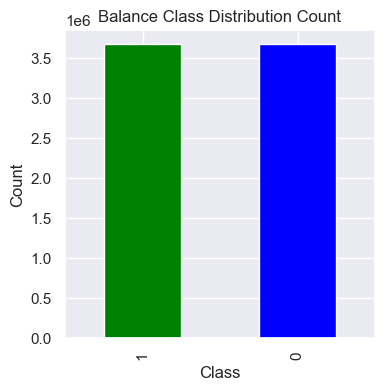

In [211]:
import seaborn as sn 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()

In [212]:
# machine learning developement

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [213]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, shuffle=True)
X_train.shape

(5868872, 45)

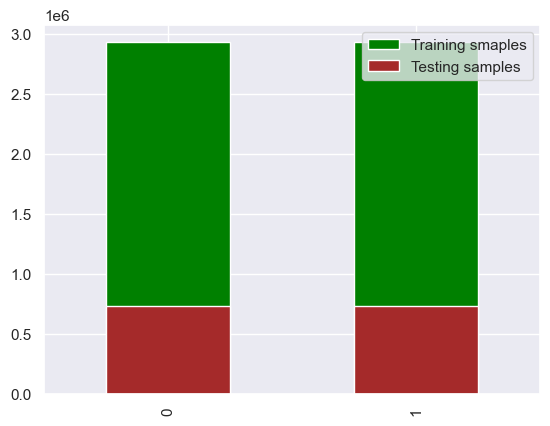

In [214]:
# confirming if the training the testing sample is balance 
y_train.value_counts().plot(kind='bar', color=['green', 'green'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [215]:
X_test

array([[9.75130092e-01, 2.54802292e-03, 0.00000000e+00, ...,
        4.66346725e-04, 5.00000000e-01, 4.28571429e-01],
       [9.75137508e-01, 2.56411533e-03, 0.00000000e+00, ...,
        1.02596279e-03, 5.00000000e-01, 4.28571429e-01],
       [9.75094195e-01, 1.70388791e-03, 0.00000000e+00, ...,
        9.32693449e-05, 5.00000000e-01, 4.28571429e-01],
       ...,
       [9.75122595e-01, 2.52205681e-03, 0.00000000e+00, ...,
        1.35664502e-04, 5.00000000e-01, 4.28571429e-01],
       [9.75128415e-01, 2.56325967e-03, 0.00000000e+00, ...,
        4.66346725e-04, 5.00000000e-01, 4.28571429e-01],
       [9.75144373e-01, 2.56538384e-03, 0.00000000e+00, ...,
        1.02596279e-03, 5.00000000e-01, 4.28571429e-01]])

In [216]:
# !pip install pyswarms

In [217]:
import numpy as np
import pyswarms as ps
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,f1_score
import seaborn as sn
import random
import time
import warnings

warnings.filterwarnings('ignore')

In [218]:
# helper method to evaluate the model.. 
def compute_metrics(tp, fp, fn, tn, avg_detection_time=None):
    """
    Compute performance metrics based on the confusion matrix values.
    Args:
        tp (int): True Positives,   fp (int): False Positives
        fn (int): False Negatives,  tn (int): True Negatives
        avg_detection_time (float, optional): Average detection time in seconds. Defaults to None.
"""

    
    # Safety check to prevent division by zero
    total = tp + fp + fn + tn
    positive = tp + fn
    negative = tn + fp

    # Metrics calculations
    tpr = tp / positive if positive > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / negative if negative > 0 else 0  # False Positive Rate
    fnr = fn / positive if positive > 0 else 0  # False Negative Rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tpr  # Recall is the same as TPR
    specificity = tn / negative if negative > 0 else 0
    accuracy = (tp + tn) / total if total > 0 else 0

    # Pack into dictionary
    metrics = {
        "TPR (Recall)": tpr,
        "FPR": fpr,
        "FNR": fnr,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "AVG EXE TIME": f'{avg_detection_time:.8f}'
    }

    return metrics  

In [109]:
 experimental_sample = 100000
# Custom DBN Class (varying number of RBM stacks)
class DBNClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, num_rbms=2, learning_rate=0.01, n_iter=4):
        self.num_rbms = num_rbms
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.pipeline = None

    def fit(self, X, y):
        layers = []
        rbm_sizes = [128, 256, 512]  # Fixed RBM sizes

        for i in range(self.num_rbms):
            layers.append(("rbm" + str(i), BernoulliRBM(n_components=rbm_sizes[i], learning_rate=self.learning_rate, n_iter=self.n_iter, verbose=0)))

        layers.append(("logreg", LogisticRegression(max_iter=1000)))
        self.pipeline = Pipeline(layers)
        self.pipeline.fit(X, y)
        return self

    def predict(self, X):
        return self.pipeline.predict(X)


# Define PSO objective function (optimize num_rbms)
def objective_function(params):
    num_rbms = int(params[0])  # Number of RBMs

    if num_rbms < 1 or num_rbms > 3:  # Limit number of RBM layers
        return 1e6  # Penalize invalid solutions
    
    model = DBNClassifier(num_rbms=num_rbms)
    model.fit(X_train[:experimental_sample], y_train[:experimental_sample])
    y_pred = model.predict(X_test[:experimental_sample])
    return -accuracy_score(y_test[:experimental_sample], y_pred[:experimental_sample])  # PSO minimizes, so negate accuracy

# Set PSO bounds (optimize only num_rbms between 1-3)
bounds = [(4, 8)]

mean = 0

for i in range(10): 
    # PSO optimization
    optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=len(bounds), options={'c1': 1.5, 'c2': 1.5, 'w': 0.5}, bounds=np.array(bounds).T)
    
    best_cost, best_num_rbms = optimizer.optimize(objective_function, iters=5)
    
    print("Best Number of RBM Stacks:", int(best_num_rbms[0]))

    mean = mean + int(best_num_rbms[0])

print('Best Average Stack', int(mean/10))

2025-03-20 17:25:23,567 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,583 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.77739648]
2025-03-20 17:25:23,598 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 4


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,614 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.65698879]
2025-03-20 17:25:23,630 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,646 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.92246198]
2025-03-20 17:25:23,646 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,661 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.20918636]
2025-03-20 17:25:23,677 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 5


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,693 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.50645926]
2025-03-20 17:25:23,708 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 4


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,724 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.33337847]
2025-03-20 17:25:23,724 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 4


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,752 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.47480403]
2025-03-20 17:25:23,762 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.86150766]


Best Number of RBM Stacks: 5


2025-03-20 17:25:23,785 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.20576167]
2025-03-20 17:25:23,801 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-20 17:25:23,817 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.07965328]


Best Number of RBM Stacks: 5
Best Average Stack 5


##### learning rate optimization using genetic algorithm

In [110]:
# Genetic Algorithm
# Fitness function
experimental_sample = 1000
def fitness_function(learning_rate):
    model = DBNClassifier(learning_rate=learning_rate)
    model.fit(X_train[:experimental_sample], y_train[:experimental_sample])
    y_pred = model.predict(X_test[:experimental_sample])
    return accuracy_score(y_test[:experimental_sample], y_pred)

# Genetic Algorithm
def genetic_algorithm(pop_size=10, generations=10, mutation_rate=0.1, bounds=(0.001, 0.1)):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], pop_size)
    for generation in range(generations):
        # Evaluate fitness
        fitness = np.array([fitness_function(ind) for ind in population])
        # Select the best individuals
        sorted_indices = np.argsort(fitness)[::-1]
        parents = population[sorted_indices[:pop_size // 2]]
        # Crossover: Generate offspring
        offspring = []
        for _ in range(pop_size // 2):
            parent1, parent2 = random.sample(list(parents), 2)
            child = (parent1 + parent2) / 2  # Average crossover
            offspring.append(child)
        # Mutation: Apply random changes
        offspring = np.array(offspring)
        mutations = np.random.uniform(-mutation_rate, mutation_rate, size=offspring.shape)
        offspring += mutations
        offspring = np.clip(offspring, bounds[0], bounds[1])  # Ensure within bounds
        # Create the new population
        population = np.concatenate((parents, offspring))
        # Log progress
        best_individual = population[np.argmax(fitness)]
        best_fitness = max(fitness)
        print(f"Generation {generation + 1}: Best Learning Rate = {best_individual:.5f}, Accuracy = {best_fitness:.4f}")
    
    # Return the best learning rate
    best_individual = population[np.argmax(fitness)]
    return best_individual

# Run GA
best_learning_rate = genetic_algorithm()
print(f"Optimal Learning Rate: {best_learning_rate:.5f}")

Generation 1: Best Learning Rate = 0.05317, Accuracy = 0.9820
Generation 2: Best Learning Rate = 0.05674, Accuracy = 0.9820
Generation 3: Best Learning Rate = 0.05317, Accuracy = 0.9820
Generation 4: Best Learning Rate = 0.10000, Accuracy = 0.9870
Generation 5: Best Learning Rate = 0.10000, Accuracy = 0.9820
Generation 6: Best Learning Rate = 0.08058, Accuracy = 0.9820
Generation 7: Best Learning Rate = 0.10000, Accuracy = 0.9840
Generation 8: Best Learning Rate = 0.10000, Accuracy = 0.9840
Generation 9: Best Learning Rate = 0.10000, Accuracy = 0.9880
Generation 10: Best Learning Rate = 0.10000, Accuracy = 0.9830
Optimal Learning Rate: 0.10000


In [219]:
# mergin everything...
class DBN_network: 

    def __init__(self, neurons=100, learning_rate=0.8, epoch=4): 
        self.neurons = neurons
        self.learning_rate=learning_rate 
        self.epoch = epoch
        self.layers_objects = []
        print('parameter initialize...')

    def config_network(self, neurons, layers=2, learning_rate=0.8):
        self.layers_objects = []
        if layers != len(neurons):
            print(f' Neuron List Value {len(neurons)} must equal Layer value {layers} layers')
        else: 
            for ep in range(layers): 
                # print(f' \n Epoch : {ep}')
                ly = BernoulliRBM(n_components=neurons[ep], learning_rate=learning_rate, n_iter=4, verbose=1)
                self.layers_objects.append(ly)
                # print(ly)

            # specify the classification head
            classifier = LogisticRegression(max_iter=1000)
            self.layers_objects.append(classifier)
            
   # to visualize the architecture using pipeline
    def summary(self):
        # using pipeline to visualize the DBN Architecture.... 
        arch_list = []
        for item in range(len(self.layers_objects)):
            arch_list.append((f'layer_{item+1}', self.layers_objects[item]))
        
        self.arch_summary = Pipeline(
            arch_list
        )

        print('DBN architecture Summary')
        return self.arch_summary

    # function to train the model... 
    def fit_model(self, X_train, y_train): 
        print(f'Training For {len(self.layers_objects[:-1])} Layer')
        self.fited_arch = []
        init_sample = X_train
        init_y = y_train
        count = 0 
        for layer in self.layers_objects[:-1]:
            print(f'\n *******************  EPOCH {count + 1} **********************')
            # fit and transform....  
            fited = layer.fit(init_sample)
            feature  = fited.transform(init_sample)
        
            # update weights
            init_sample = feature
        
            # store layer weights
            self.fited_arch.append(fited)
            count = count + 1
            
        # fit the classification head 
        print('\n+-----------------------------------------+')
        self.class_head = self.layers_objects[-1].fit(init_sample, init_y)
        
        return self.arch_summary

    # prediction  function 
    def predict(self, X_test, y_test): 
        init_sample = X_test
        init_y = y_test
        for layer in self.fited_arch:
            
            # transform....  
            feature  = layer.transform(init_sample)
            
            # update weights
            init_sample = feature
            print(f'Calculated Feature {init_sample.shape}')
                           
        # fit the classification head 
        if self.fited_arch != []: 
            prediction = self.class_head.predict(init_sample)
            pre = {'pre': prediction}
            return pre
        else: 
            error = 'Error: model should be trained first....'
            return {error, []}


In [220]:
X_train.shape

(5868872, 45)

In [221]:
# initializaing DBN
dbn_bot_iot = DBN_network()
# configure the DBN... 
dbn_bot_iot.config_network([45, 45, 22, 22, 11], layers=5, learning_rate=0.10000)

# showing the DBN architecture.. 
dbn_bot_iot.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1', BernoulliRBM(n_components=45, n_iter=4, verbose=1)),
                ('layer_2', BernoulliRBM(n_components=45, n_iter=4, verbose=1)),
                ('layer_3', BernoulliRBM(n_components=22, n_iter=4, verbose=1)),
                ('layer_4', BernoulliRBM(n_components=22, n_iter=4, verbose=1)),
                ('layer_5', BernoulliRBM(n_components=11, n_iter=4, verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [222]:
# training the arhitecture
dbn_bot_iot.fit_model(X_train[:10000], y_train[:10000])

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -8.82, time = 0.59s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -7.87, time = 0.53s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -8.11, time = 0.28s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -8.15, time = 0.49s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -22.34, time = 0.77s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -22.91, time = 0.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -21.69, time = 0.34s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.85, time = 0.31s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -6.74, time = 0.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -6.41, time = 0.20s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.35, time = 0.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -6.64, time = 0.1

Pipeline(steps=[('layer_1', BernoulliRBM(n_components=45, n_iter=4, verbose=1)),
                ('layer_2', BernoulliRBM(n_components=45, n_iter=4, verbose=1)),
                ('layer_3', BernoulliRBM(n_components=22, n_iter=4, verbose=1)),
                ('layer_4', BernoulliRBM(n_components=22, n_iter=4, verbose=1)),
                ('layer_5', BernoulliRBM(n_components=11, n_iter=4, verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

Calculated Feature (1467218, 45)
Calculated Feature (1467218, 45)
Calculated Feature (1467218, 22)
Calculated Feature (1467218, 22)
Calculated Feature (1467218, 11)

EXE TIME
Total Detection Time : 13.750939
AVG Detection Time : 0.00000937 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    733609
           1       1.00      0.98      0.99    733609

    accuracy                           0.99   1467218
   macro avg       0.99      0.99      0.99   1467218
weighted avg       0.99      0.99      0.99   1467218





<Axes: >

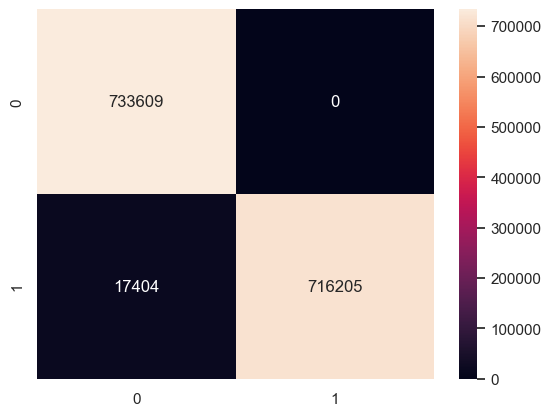

In [225]:
# make prediction
strt_time = time.time()
prediction = dbn_bot_iot.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [226]:
tp, fp, fn, tn = conf_report.ravel()
bot_iot_metrics = compute_metrics(tp, fp, fn, tn, avg_time)
print(bot_iot_metrics)
bot_iot_result = pd.Series(bot_iot_metrics)
bot_iot_result

{'TPR (Recall)': 0.9768259670604903, 'FPR': 0.0, 'FNR': 0.023174032939509703, 'Accuracy': 0.9881380953614255, 'Precision': 1.0, 'Recall': 0.9768259670604903, 'Specificity': 1.0, 'AVG EXE TIME': '0.00000937'}


TPR (Recall)      0.976826
FPR                    0.0
FNR               0.023174
Accuracy          0.988138
Precision              1.0
Recall            0.976826
Specificity            1.0
AVG EXE TIME    0.00000937
dtype: object

## Dataset THREE (NSL-KDDT)

In [46]:
columns = (['duration','protocol_type','service','flag','src_bytes'
,'dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in'
,'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells'
,'num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count'
,'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate'
,'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate'
,'dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

# df.columns = columns

In [47]:
# NSL-KDD datset

df2  = pd.read_csv("NSL-KDD/KDDTrain+.txt",names=columns)
# df2 = df_0.copy()
df2.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15


In [48]:
df2.sample(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
36011,991,tcp,other,RSTR,1,0,0,0,0,0,...,0.01,0.73,1.00,0.00,0.0,0.0,1.0,1.0,portsweep,15
86832,0,tcp,http,SF,279,757,0,0,0,0,...,1.00,0.00,0.02,0.04,0.0,0.0,0.0,0.0,normal,21
122135,0,tcp,http,SF,209,296,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal,21
54658,0,tcp,private,S0,0,0,0,0,0,0,...,0.13,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune,18


In [49]:
df2.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [51]:
df2.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [52]:
for col in df2.columns: 
    unique= df2[col].unique()
    print(unique)

[    0  5607   507 ...  5430 11680   679]
['tcp' 'udp' 'icmp']
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
[  491   146     0 ...  2816 11466  2358]
[    0  8153   420 ...  5424 17655 52866]
[0 1]
[0 3 1]
[0 1 3 2]
[ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]
[0 2 1 3 4 5]
[0 1]
[   0    3    2    1   19    5    4

In [53]:
print(f'total null value = {df2.isnull().sum().sum()}')

total null value = 0


In [54]:
print(f' Total Duplicate = {df2.duplicated().sum()}')

 Total Duplicate = 0


In [55]:
df2.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

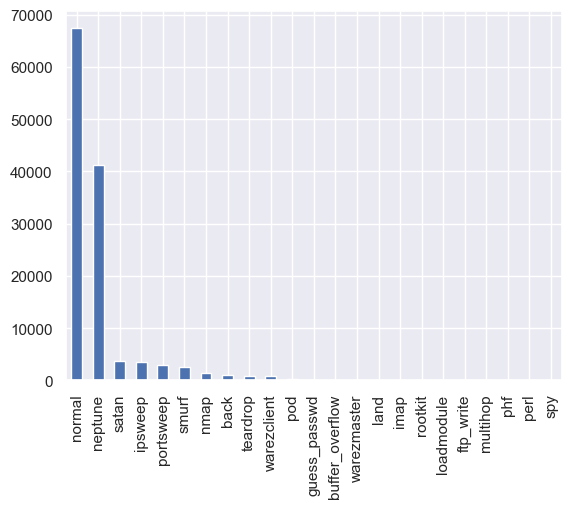

In [56]:
df2.attack.value_counts().plot(kind='bar')
plt.show()

In [57]:
attack_type = df2['attack'][df2.attack != 'normal'].unique().tolist()
print(attack_type)

['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd', 'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl']


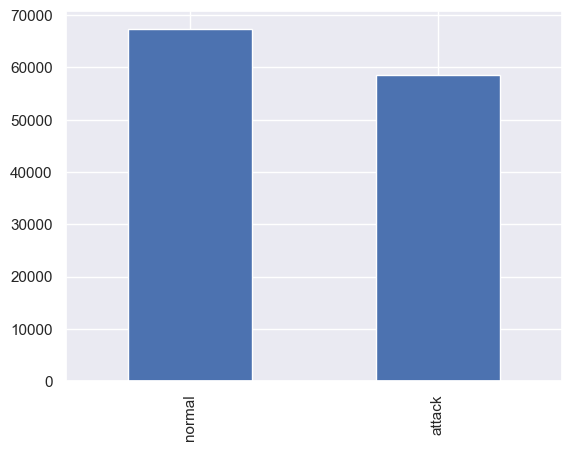

In [58]:
df2['attack'] = df2.attack.replace(to_replace=attack_type,value='attack')
df2.attack.value_counts().plot(kind='bar')
plt.show()

In [59]:
data = df2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [60]:
for col in data.columns: 
    if data[col].dtype == 'object': 
        data[col] = data[col].astype('category').cat.codes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int8   
 2   service                      125973 non-null  int8   
 3   flag                         125973 non-null  int8   
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [61]:
X, y  = data.drop(columns=['attack']) , data.attack
X.shape

(125973, 42)

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize MinMaxScaler to scale data to [0,1]
scaler = StandardScaler()

# Fit and transform training data
X_scalled = scaler.fit_transform(X)
X_scalled

array([[-0.11024922, -0.12470616, -0.68678521, ..., -0.22453241,
        -0.37638703,  0.21642633],
       [-0.11024922,  2.21931185,  0.78142753, ..., -0.38763462,
        -0.37638703, -1.9655564 ],
       [-0.11024922, -0.12470616,  1.08730518, ..., -0.38763462,
        -0.37638703, -0.21997022],
       ...,
       [-0.11024922, -0.12470616,  1.39318283, ..., -0.35501418,
        -0.37638703, -0.65636676],
       [-0.11024922, -0.12470616, -0.0750299 , ..., -0.38763462,
        -0.37638703,  0.21642633],
       [-0.11024922, -0.12470616, -0.68678521, ..., -0.38763462,
        -0.37638703,  0.65282288]])

In [82]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN


# Apply SMOTE to balance the dataset
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_scalled, y)

<Figure size 400x400 with 0 Axes>

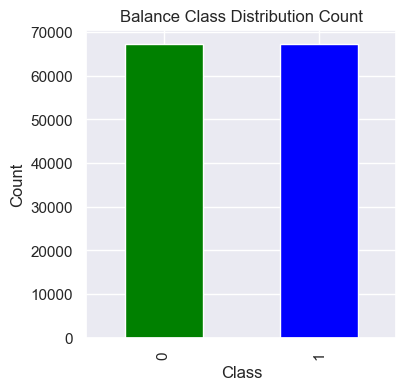

In [83]:
import seaborn as sn 
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sn.set_style(style='darkgrid')
plt.figure(figsize=(4,4))
y_resampled.value_counts().plot(kind='bar', color=['green', 'blue'])
plt.title('Balance Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()
plt.grid()


In [84]:
y_resampled.value_counts()

0    67196
1    67191
Name: attack, dtype: int64

In [85]:
# machine learning developement

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [86]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled ,  test_size=0.2, shuffle=True)
X_train.shape

(107509, 42)

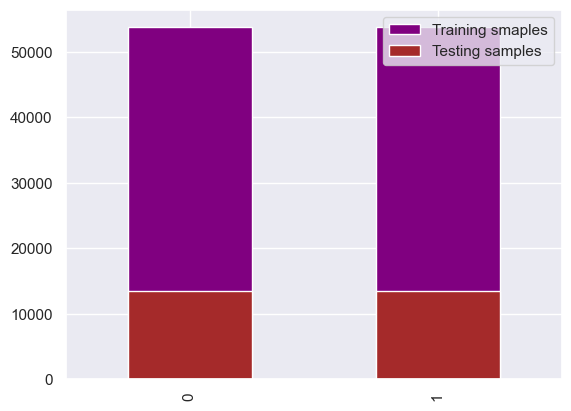

In [87]:
# confirming if the training the testing sample is balance 
y_train.value_counts().plot(kind='bar', color=['purple', 'purple'])
y_test.value_counts().plot(kind='bar', color=['brown', 'brown'])
plt.legend(labels=['Training smaples', 'Testing samples'])

In [ ]:
experimental_sample = 100000
# Custom DBN Class (varying number of RBM stacks)
class DBNClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, num_rbms=2, learning_rate=0.01, n_iter=4):
        self.num_rbms = num_rbms
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.pipeline = None

    def fit(self, X, y):
        layers = []
        rbm_sizes = [128, 256, 512] 

        for i in range(self.num_rbms):
            layers.append(("rbm" + str(i), BernoulliRBM(n_components=rbm_sizes[i], learning_rate=self.learning_rate, n_iter=self.n_iter, verbose=0)))

        layers.append(("logreg", LogisticRegression(max_iter=1000)))
        self.pipeline = Pipeline(layers)
        self.pipeline.fit(X, y)
        return self

    def predict(self, X):
        return self.pipeline.predict(X)


# Define PSO objective function (optimize num_rbms)
def objective_function(params):
    num_rbms = int(params[0])  # Number of RBMs

    if num_rbms < 1 or num_rbms > 3:  # Limit number of RBM layers
        return 1e6  # Penalize invalid solutions
    
    model = DBNClassifier(num_rbms=num_rbms)
    model.fit(X_train[:experimental_sample], y_train[:experimental_sample])
    y_pred = model.predict(X_test[:experimental_sample])
    return -accuracy_score(y_test[:experimental_sample], y_pred[:experimental_sample])  # PSO minimizes, so negate accuracy

# Set PSO bounds (optimize only num_rbms between 1-3)
bounds = [(4, 8)]

mean = 0

for i in range(10): 
    # PSO optimization
    optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=len(bounds), options={'c1': 1.5, 'c2': 1.5, 'w': 0.5}, bounds=np.array(bounds).T)
    
    best_cost, best_num_rbms = optimizer.optimize(objective_function, iters=5)
    
    print("Best Number of RBM Stacks:", int(best_num_rbms[0]))

    mean = mean + int(best_num_rbms[0])

print('Best Average Stack', int(mean/10))

2025-03-21 07:35:31,746 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:31,798 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.1875851]
2025-03-21 07:35:31,865 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:31,940 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.5922007]
2025-03-21 07:35:31,965 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 4


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,031 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.20683254]
2025-03-21 07:35:32,065 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,127 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.21688944]
2025-03-21 07:35:32,162 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,213 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.14767323]


Best Number of RBM Stacks: 5


2025-03-21 07:35:32,264 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,328 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.01319761]
2025-03-21 07:35:32,362 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 5


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,464 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [6.8741199]
2025-03-21 07:35:32,494 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 6


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,624 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [5.30661588]
2025-03-21 07:35:32,646 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 5


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,740 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [7.93673865]
2025-03-21 07:35:32,774 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Best Number of RBM Stacks: 7


pyswarms.single.global_best: 100%|█████████████████|5/5, best_cost=1e+6
2025-03-21 07:35:32,863 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1000000.0, best pos: [4.95261629]


Best Number of RBM Stacks: 4
Best Average Stack 5


In [79]:
# Genetic Algorithm
# Fitness function
experimental_sample = 1000
def fitness_function(learning_rate):
    model = DBNClassifier(learning_rate=learning_rate)
    model.fit(X_train[:experimental_sample], y_train[:experimental_sample])
    y_pred = model.predict(X_test[:experimental_sample])
    return accuracy_score(y_test[:experimental_sample], y_pred)

# Genetic Algorithm
def genetic_algorithm(pop_size=10, generations=10, mutation_rate=0.1, bounds=(0.001, 0.1)):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], pop_size)
    for generation in range(generations):
        # Evaluate fitness
        fitness = np.array([fitness_function(ind) for ind in population])
        # Select the best individuals
        sorted_indices = np.argsort(fitness)[::-1]
        parents = population[sorted_indices[:pop_size // 2]]
        # Crossover: Generate offspring
        offspring = []
        for _ in range(pop_size // 2):
            parent1, parent2 = random.sample(list(parents), 2)
            child = (parent1 + parent2) / 2  # Average crossover
            offspring.append(child)
        # Mutation: Apply random changes
        offspring = np.array(offspring)
        mutations = np.random.uniform(-mutation_rate, mutation_rate, size=offspring.shape)
        offspring += mutations
        offspring = np.clip(offspring, bounds[0], bounds[1])  # Ensure within bounds
        # Create the new population
        population = np.concatenate((parents, offspring))
        # Log progress
        best_individual = population[np.argmax(fitness)]
        best_fitness = max(fitness)
        print(f"Generation {generation + 1}: Best Learning Rate = {best_individual:.5f}, Accuracy = {best_fitness:.4f}")
    
    # Return the best learning rate
    best_individual = population[np.argmax(fitness)]
    return best_individual

# Run GA
best_learning_rate = genetic_algorithm()
print(f"Optimal Learning Rate: {best_learning_rate:.5f}")

Generation 1: Best Learning Rate = 0.10000, Accuracy = 0.9380
Generation 2: Best Learning Rate = 0.10000, Accuracy = 0.9370
Generation 3: Best Learning Rate = 0.10000, Accuracy = 0.9370
Generation 4: Best Learning Rate = 0.10000, Accuracy = 0.9380
Generation 5: Best Learning Rate = 0.10000, Accuracy = 0.9390
Generation 6: Best Learning Rate = 0.10000, Accuracy = 0.9390
Generation 7: Best Learning Rate = 0.09317, Accuracy = 0.9380
Generation 8: Best Learning Rate = 0.10000, Accuracy = 0.9400
Generation 9: Best Learning Rate = 0.10000, Accuracy = 0.9390
Generation 10: Best Learning Rate = 0.10000, Accuracy = 0.9370
Optimal Learning Rate: 0.10000


In [89]:
X_train.shape

(107509, 42)

In [90]:
# initializaing DBN
dbn_nsl_kdd = DBN_network()
# configure the DBN... 
dbn_nsl_kdd.config_network([42, 42, 21, 21, 10], layers=5, learning_rate=0.05753)

# showing the DBN architecture.. 
dbn_nsl_kdd.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.05753, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.05753, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.05753, n_components=21, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.05753, n_components=21, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.05753, n_components=10, n_iter=4,
                              verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

In [91]:
# training the arhitecture
dbn_nsl_kdd.fit_model(X_train, y_train)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -3234.08, time = 7.34s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -7238.52, time = 8.48s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -10127.82, time = 12.77s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -13611.90, time = 10.72s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.13, time = 10.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.88, time = 13.17s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.46, time = 13.19s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.67, time = 12.78s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.74, time = 9.15s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.68, time = 10.36s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.76, time = 10.15s
[BernoulliRBM] Iteration 4, pseudo-likelihood =

Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.05753, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.05753, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.05753, n_components=21, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.05753, n_components=21, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.05753, n_components=10, n_iter=4,
                              verbose=1)),
                ('layer_6', LogisticRegression(max_iter=1000))])

Calculated Feature (26878, 42)
Calculated Feature (26878, 42)
Calculated Feature (26878, 21)
Calculated Feature (26878, 21)
Calculated Feature (26878, 10)

EXE TIME
Total Detection Time : 0.535951
AVG Detection Time : 0.00001994 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     13440
           1       0.90      0.94      0.92     13438

    accuracy                           0.92     26878
   macro avg       0.92      0.92      0.92     26878
weighted avg       0.92      0.92      0.92     26878





<Axes: >

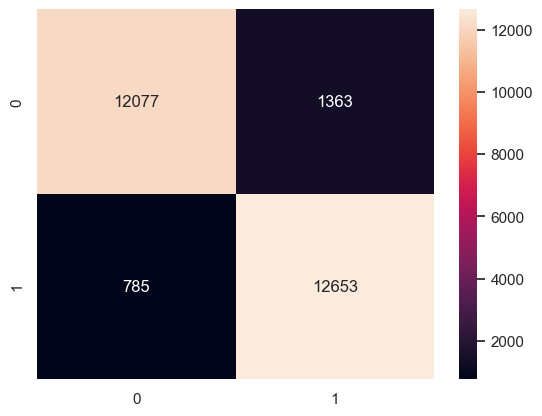

In [92]:
# make prediction
strt_time = time.time()
prediction = dbn_nsl_kdd.predict(X_test, y_test)
stop_time = time.time()

print('\nEXE TIME')
total_time  = stop_time - strt_time
avg_time = total_time / X_test.shape[0]
print(f'Total Detection Time : {total_time:.6f}')
print(f'AVG Detection Time : {avg_time:.8f} \n')

# evaluation report 
class_report = classification_report(y_test, prediction['pre'])
conf_report = confusion_matrix(y_test, prediction['pre'])
print(class_report)
print('\n')
sn.heatmap(conf_report, fmt='d', annot=True)

In [93]:
tp, fp, fn, tn = conf_report.ravel()
nsl_kdd_metrics = compute_metrics(tp, fp, fn, tn, avg_time)
print(nsl_kdd_metrics)
nsl_kdd_result = pd.Series(nsl_kdd_metrics)
nsl_kdd_result

{'TPR (Recall)': 0.9389675011662261, 'FPR': 0.09724600456621005, 'FNR': 0.06103249883377391, 'Accuracy': 0.9200833395341915, 'Precision': 0.8985863095238096, 'Recall': 0.9389675011662261, 'Specificity': 0.90275399543379, 'AVG EXE TIME': '0.00001994'}


TPR (Recall)      0.938968
FPR               0.097246
FNR               0.061032
Accuracy          0.920083
Precision         0.898586
Recall            0.938968
Specificity       0.902754
AVG EXE TIME    0.00001994
dtype: object

In [228]:
experimental_result = pd.DataFrame([CIC_DDos_result, bot_iot_result, nsl_kdd_result])
experimental_result['Dataset'] = ['CIC-DDoS2019 Dataset', 'BOT-IOT dataset', 'NSL-KDD dataset' ]
experimental_result

,TPR (Recall),FPR,FNR,Accuracy,Precision,Recall,Specificity,AVG EXE TIME,Dataset
0,1.000000,0.232363,0.000000,0.848651,0.697301,1.000000,0.767637,0.00002803,CIC-DDoS2019 Dataset
1,0.976826,0.000000,0.023174,0.988138,1.000000,0.976826,1.000000,0.00000937,BOT-IOT dataset
2,0.938968,0.097246,0.061032,0.920083,0.898586,0.938968,0.902754,0.00001994,NSL-KDD dataset


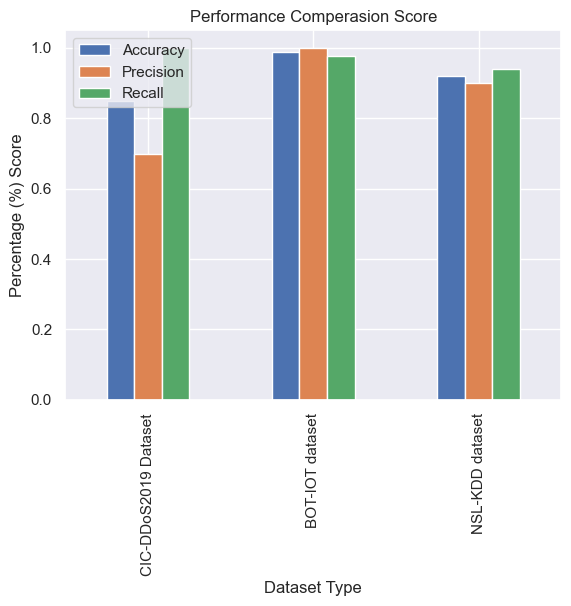

In [236]:
experimental_result[['Accuracy', 'Precision', 'Recall']].plot(kind='bar')
plt.xticks(ticks=[0,1,2], labels=experimental_result.Dataset)
plt.xlabel('Dataset Type')
plt.ylabel('Percentage (%) Score')
plt.title('Performance Comperasion Score')
plt.show()